<a href="https://colab.research.google.com/github/lvv121/Predictive_Modeling_of_Tensile_Strength_in_Wool_Reinforced_PLA_Composites_Using_Python_Libraries/blob/main/Predictive_Modeling_of_Tensile_Strength_in_Wool_Reinforced_PLA_Composites_Using_Python_Libraries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy scikit-learn matplotlib seaborn joblib xgboost lightgbm catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.7 MB/s eta 0:00:00


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data loaded from /content/drive/MyDrive/ANALIZA_DANYCH/db_PLA_wool_ca_mechterm v2.csv, shape: (155, 20)
Available columns: ['PLA_type', '  MLO_phr', '  wool_phr', '  ca_phr', '  ca_type', 'tensile strength', 'elongation at brake', 'Young modulus', 'Flexural resistance', 'Flexural modulus', '  hardness', '  impact', 'PLA Tg', 'PLA Tcc', 'PLA Tm', 'PLA Xc%', 'T5', 'Tmax', 'Mass loss 300', 'Mass loss 350']
Unique coupling agent types before conversion: ['a' 'b' 'c' 'd' '0']
Columns after get_dummies: ['MLO_phr', 'wool_phr', 'ca_phr', 'tensile strength', 'PLA_type_6210D', 'ca_type_0', 'ca_type_a', 'ca_type_b', 'ca_type_c', 'ca_type_d']
Data after preprocessing, shape: (155, 10)
Train set: (116, 9), Test set: (39, 9)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000031 seconds.
You can set `force_col_wise=true` to remove t

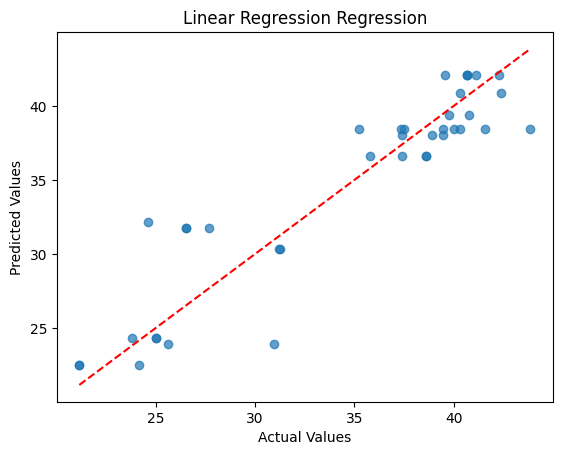

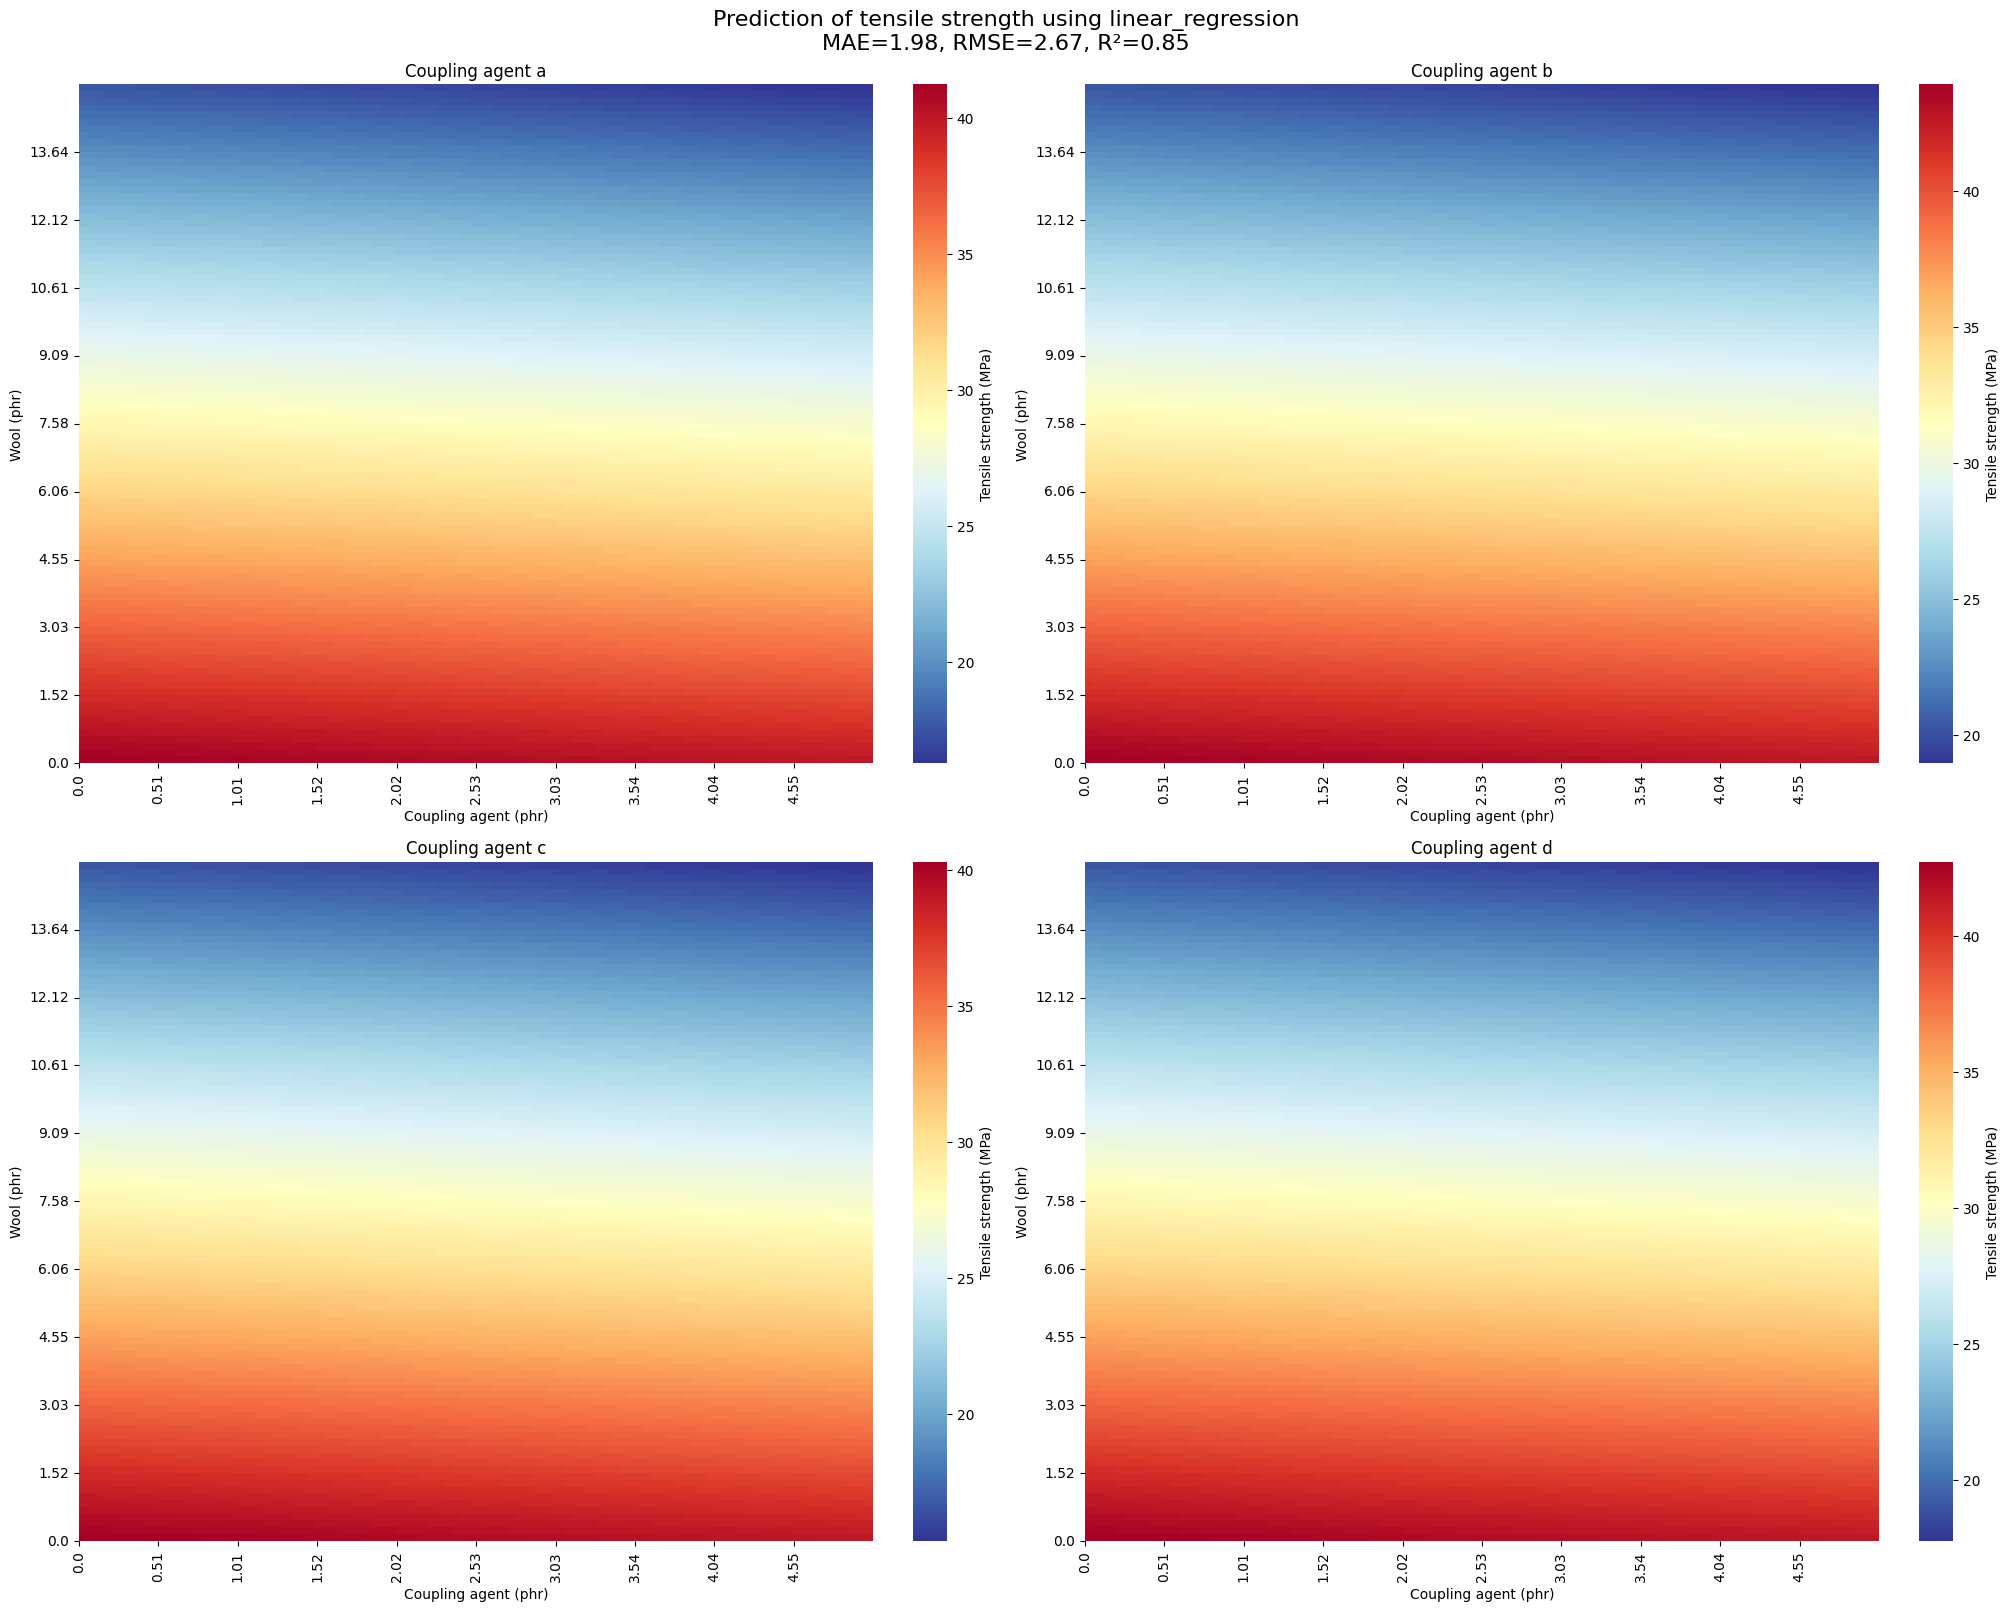

Gradient Boosting - MSE: 4.8254821750247485, MAE: 1.7442795838645146, RMSE: 2.1966980163474332, RSE: 0.09969365567380604, RAE: 0.2798888110968027, R²: 0.9003063443261939
Results saved to /content/drive/MyDrive/ANALIZA_DANYCH/Tensile_strength_gradient_boosting_prediction.csv


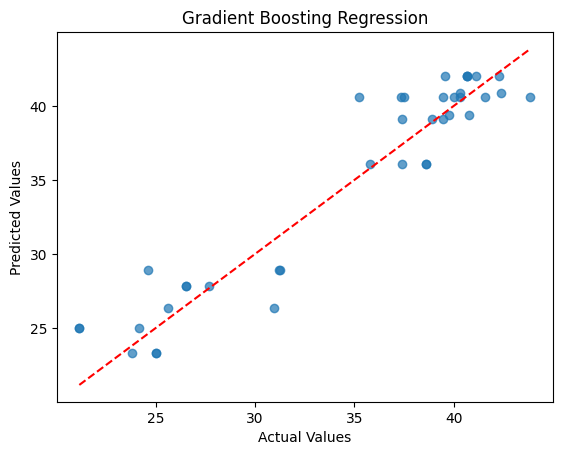

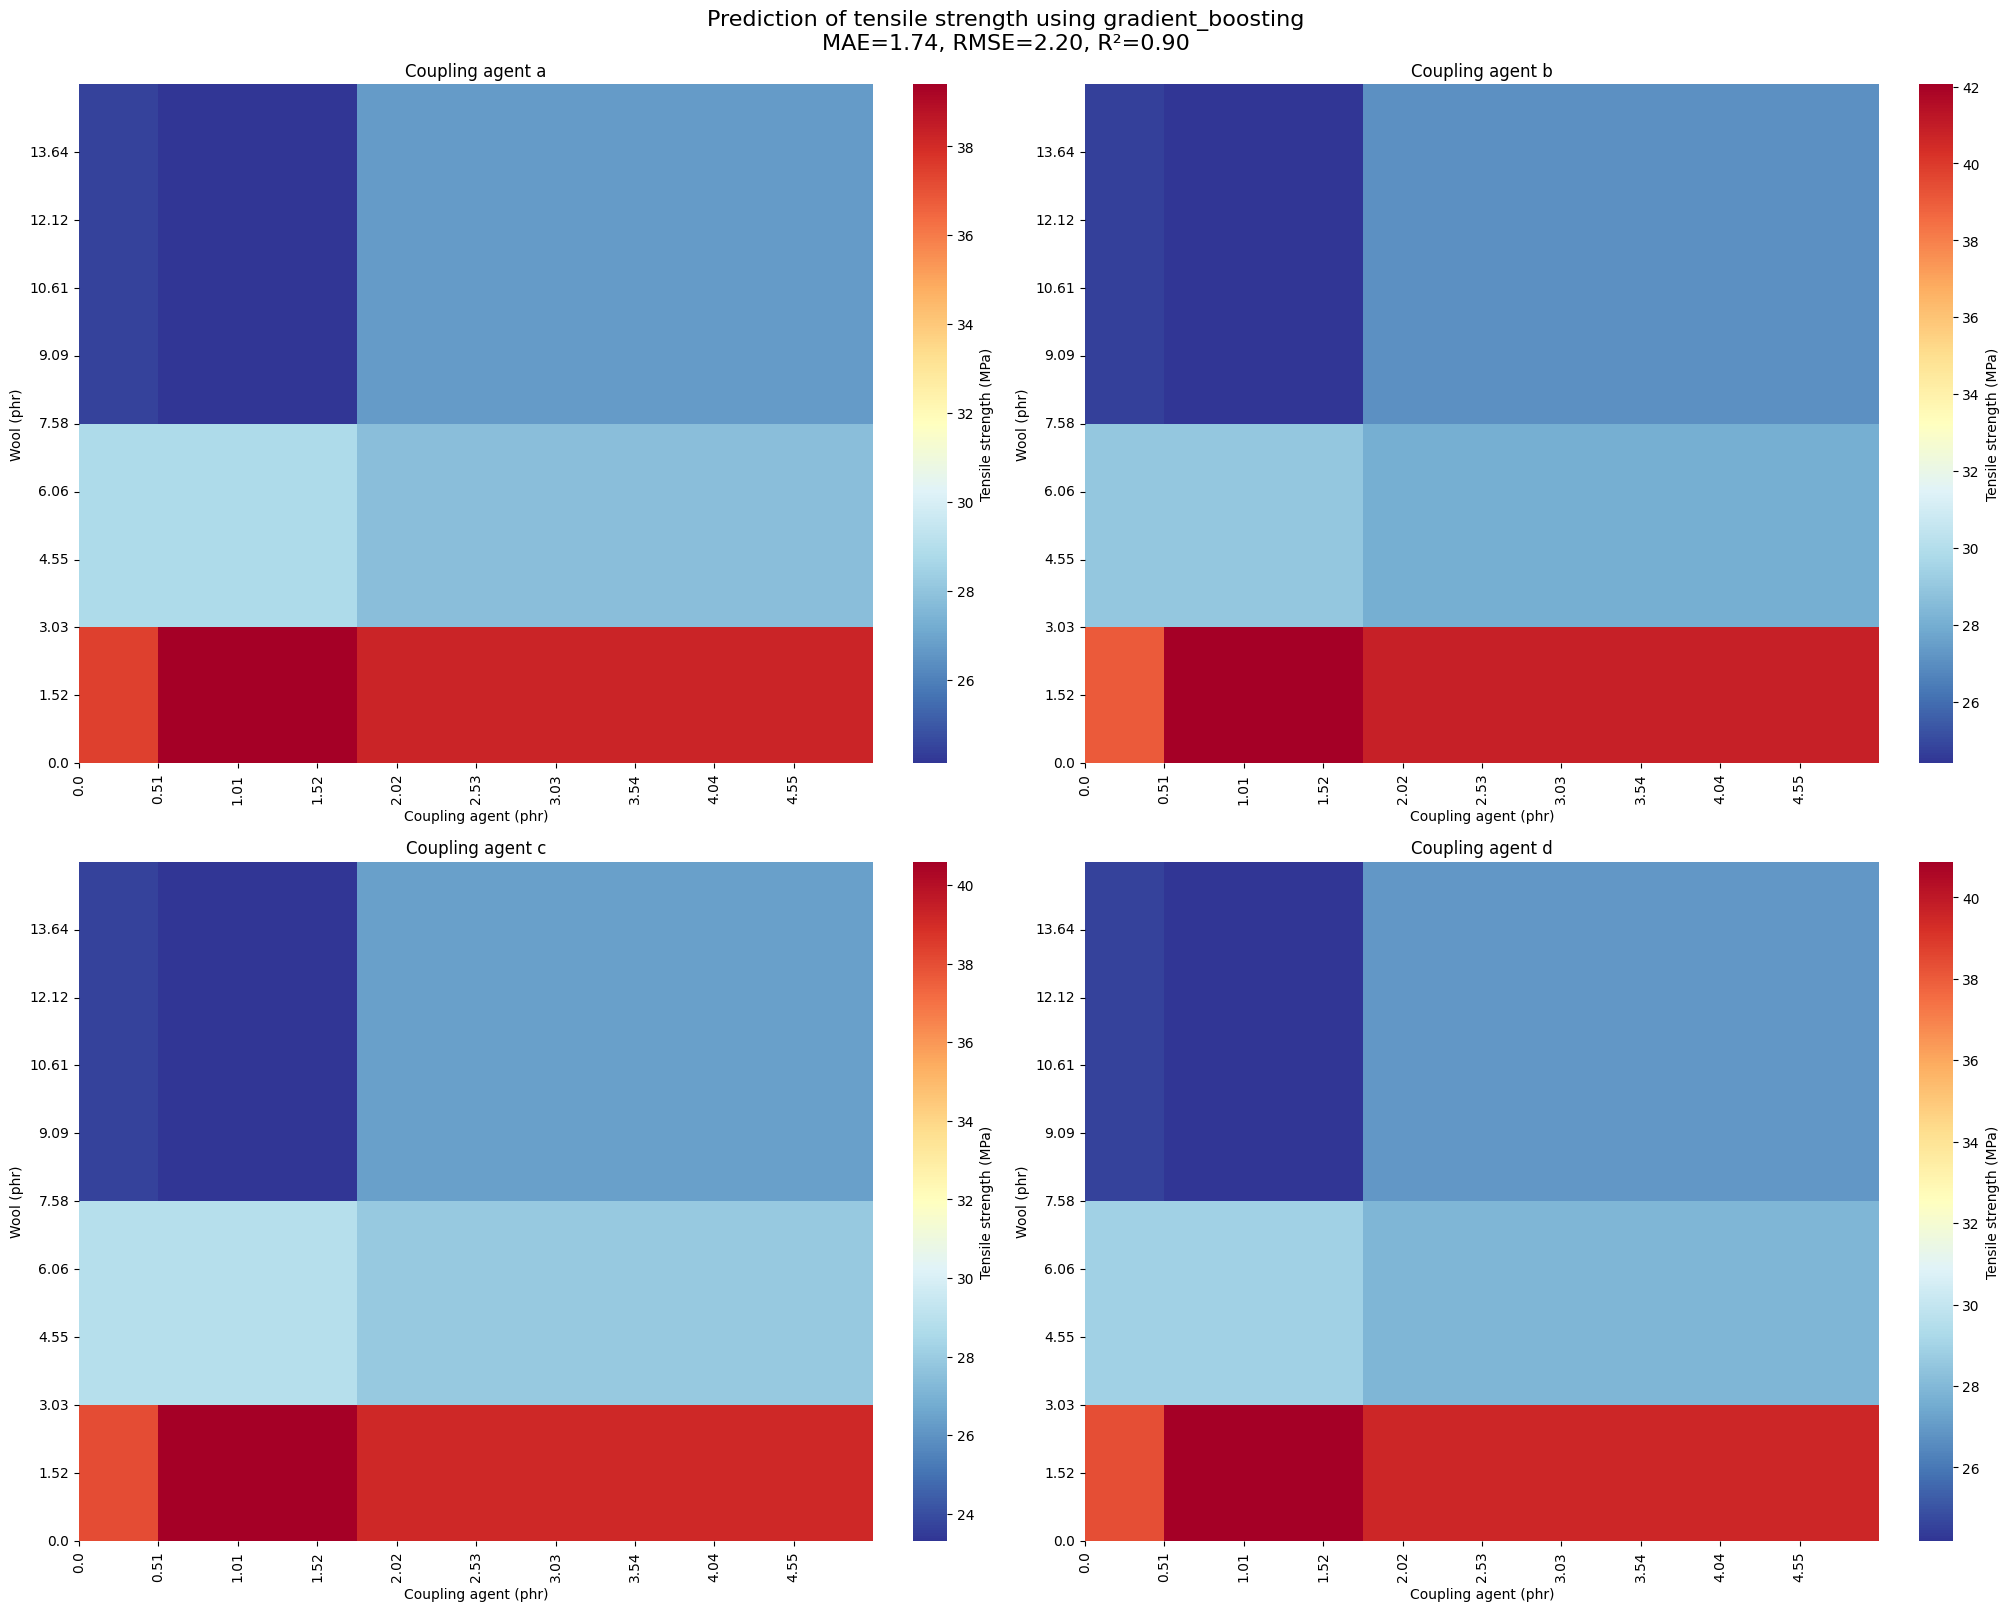

Random Forest - MSE: 4.910021490666975, MAE: 1.7650608619895958, RMSE: 2.215856829911846, RSE: 0.1014402238132878, RAE: 0.28322339534654456, R²: 0.8985597761867122
Results saved to /content/drive/MyDrive/ANALIZA_DANYCH/Tensile_strength_random_forest_prediction.csv


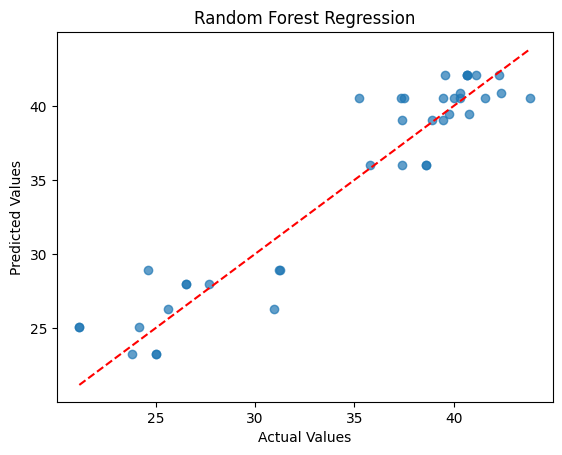

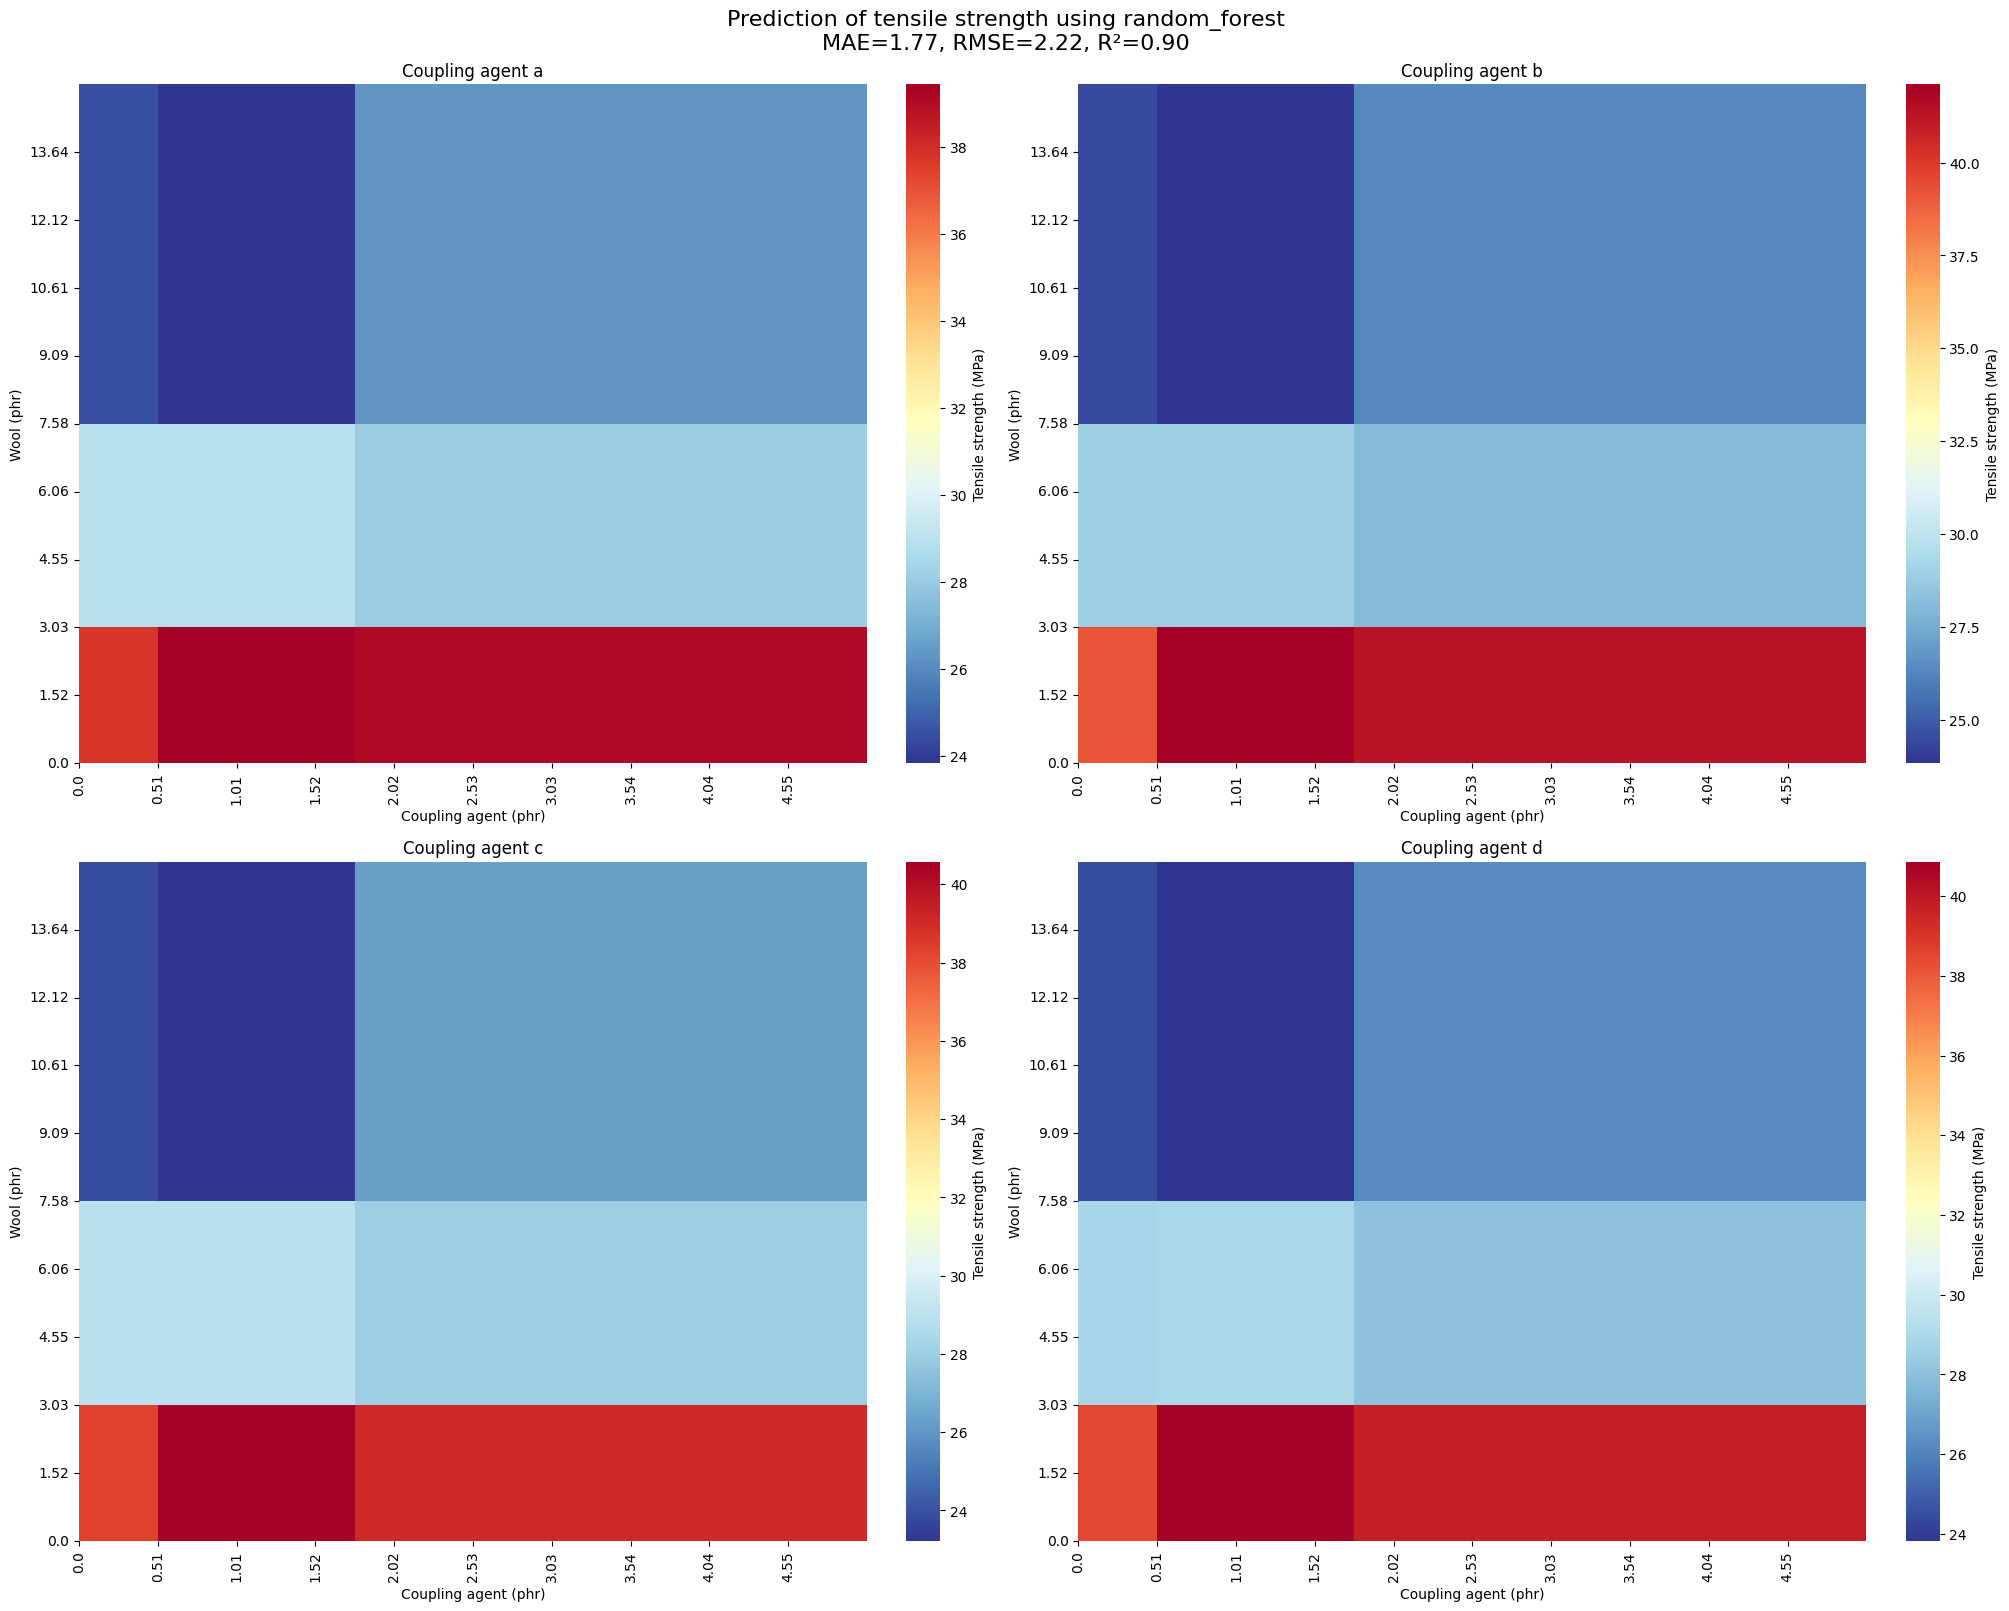

SVR - MSE: 7.139248037368087, MAE: 1.9767904235180698, RMSE: 2.671937132001441, RSE: 0.14749567189181864, RAE: 0.31719772824503417, R²: 0.8525043281081813
Results saved to /content/drive/MyDrive/ANALIZA_DANYCH/Tensile_strength_svr_prediction.csv


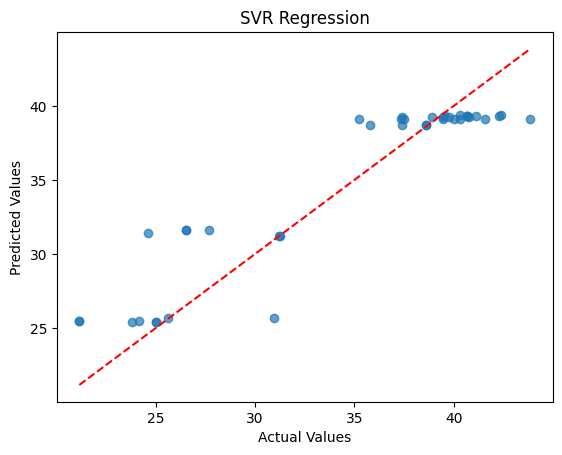

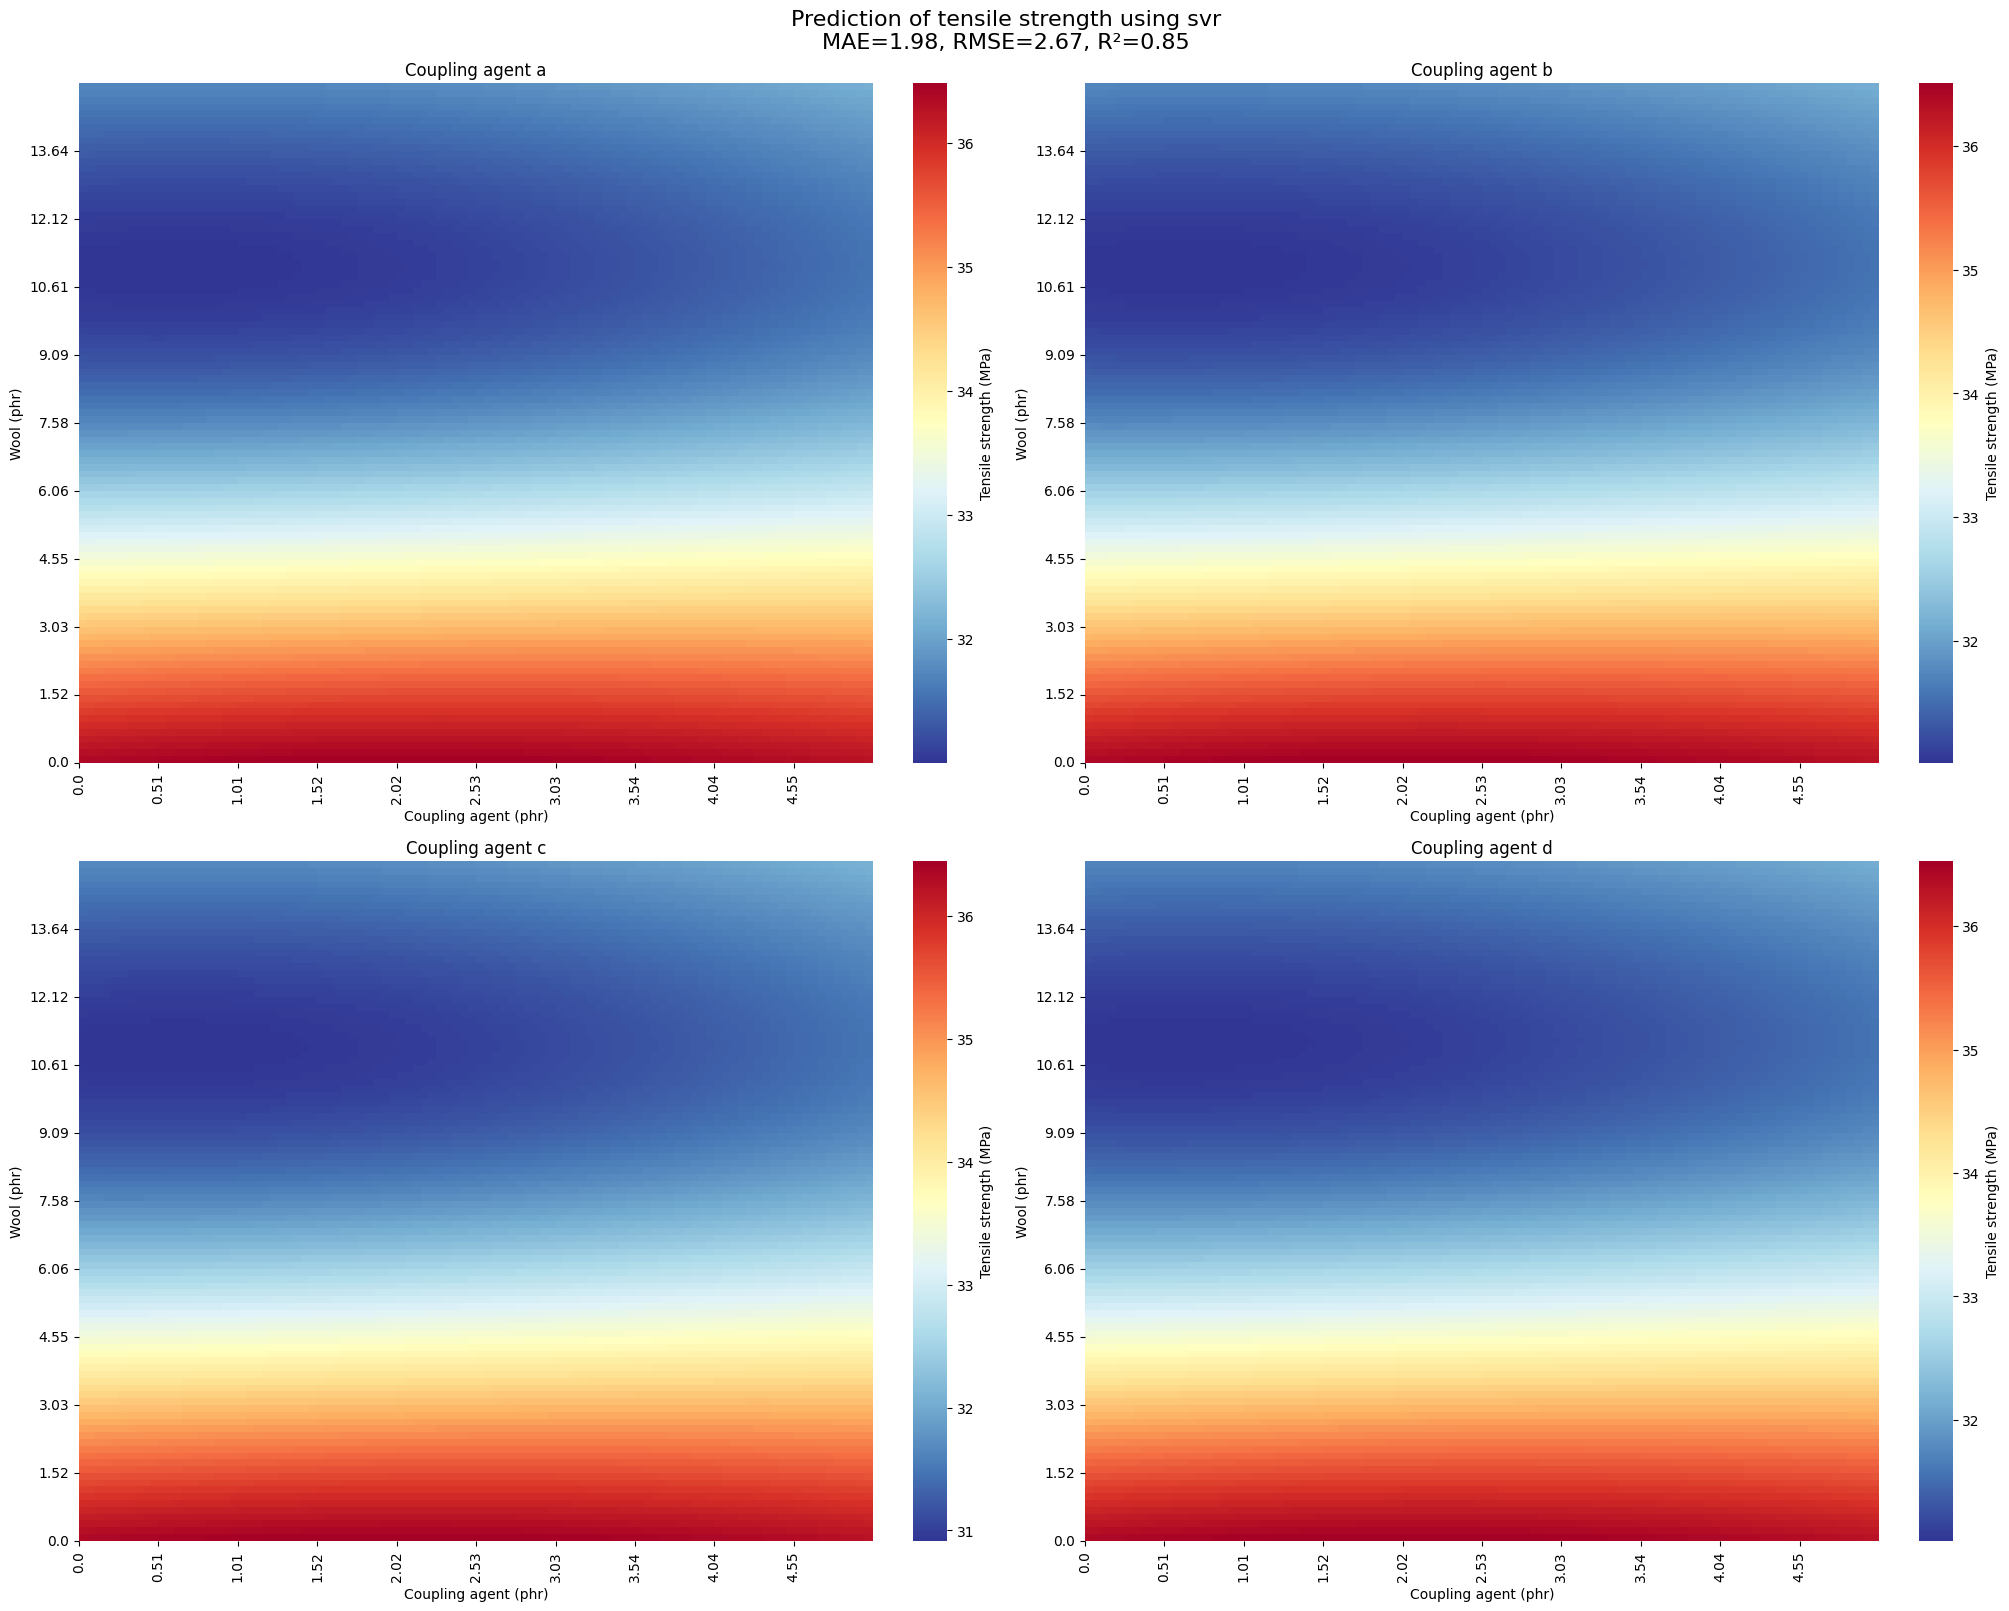

Ridge Regression - MSE: 7.0612630999771655, MAE: 1.94393520373836, RMSE: 2.6573037274608193, RSE: 0.14588451611214692, RAE: 0.31192574748717106, R²: 0.8541154838878531
Results saved to /content/drive/MyDrive/ANALIZA_DANYCH/Tensile_strength_ridge_regression_prediction.csv


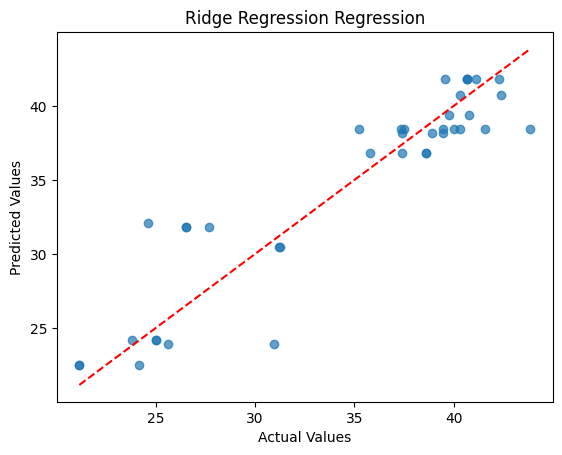

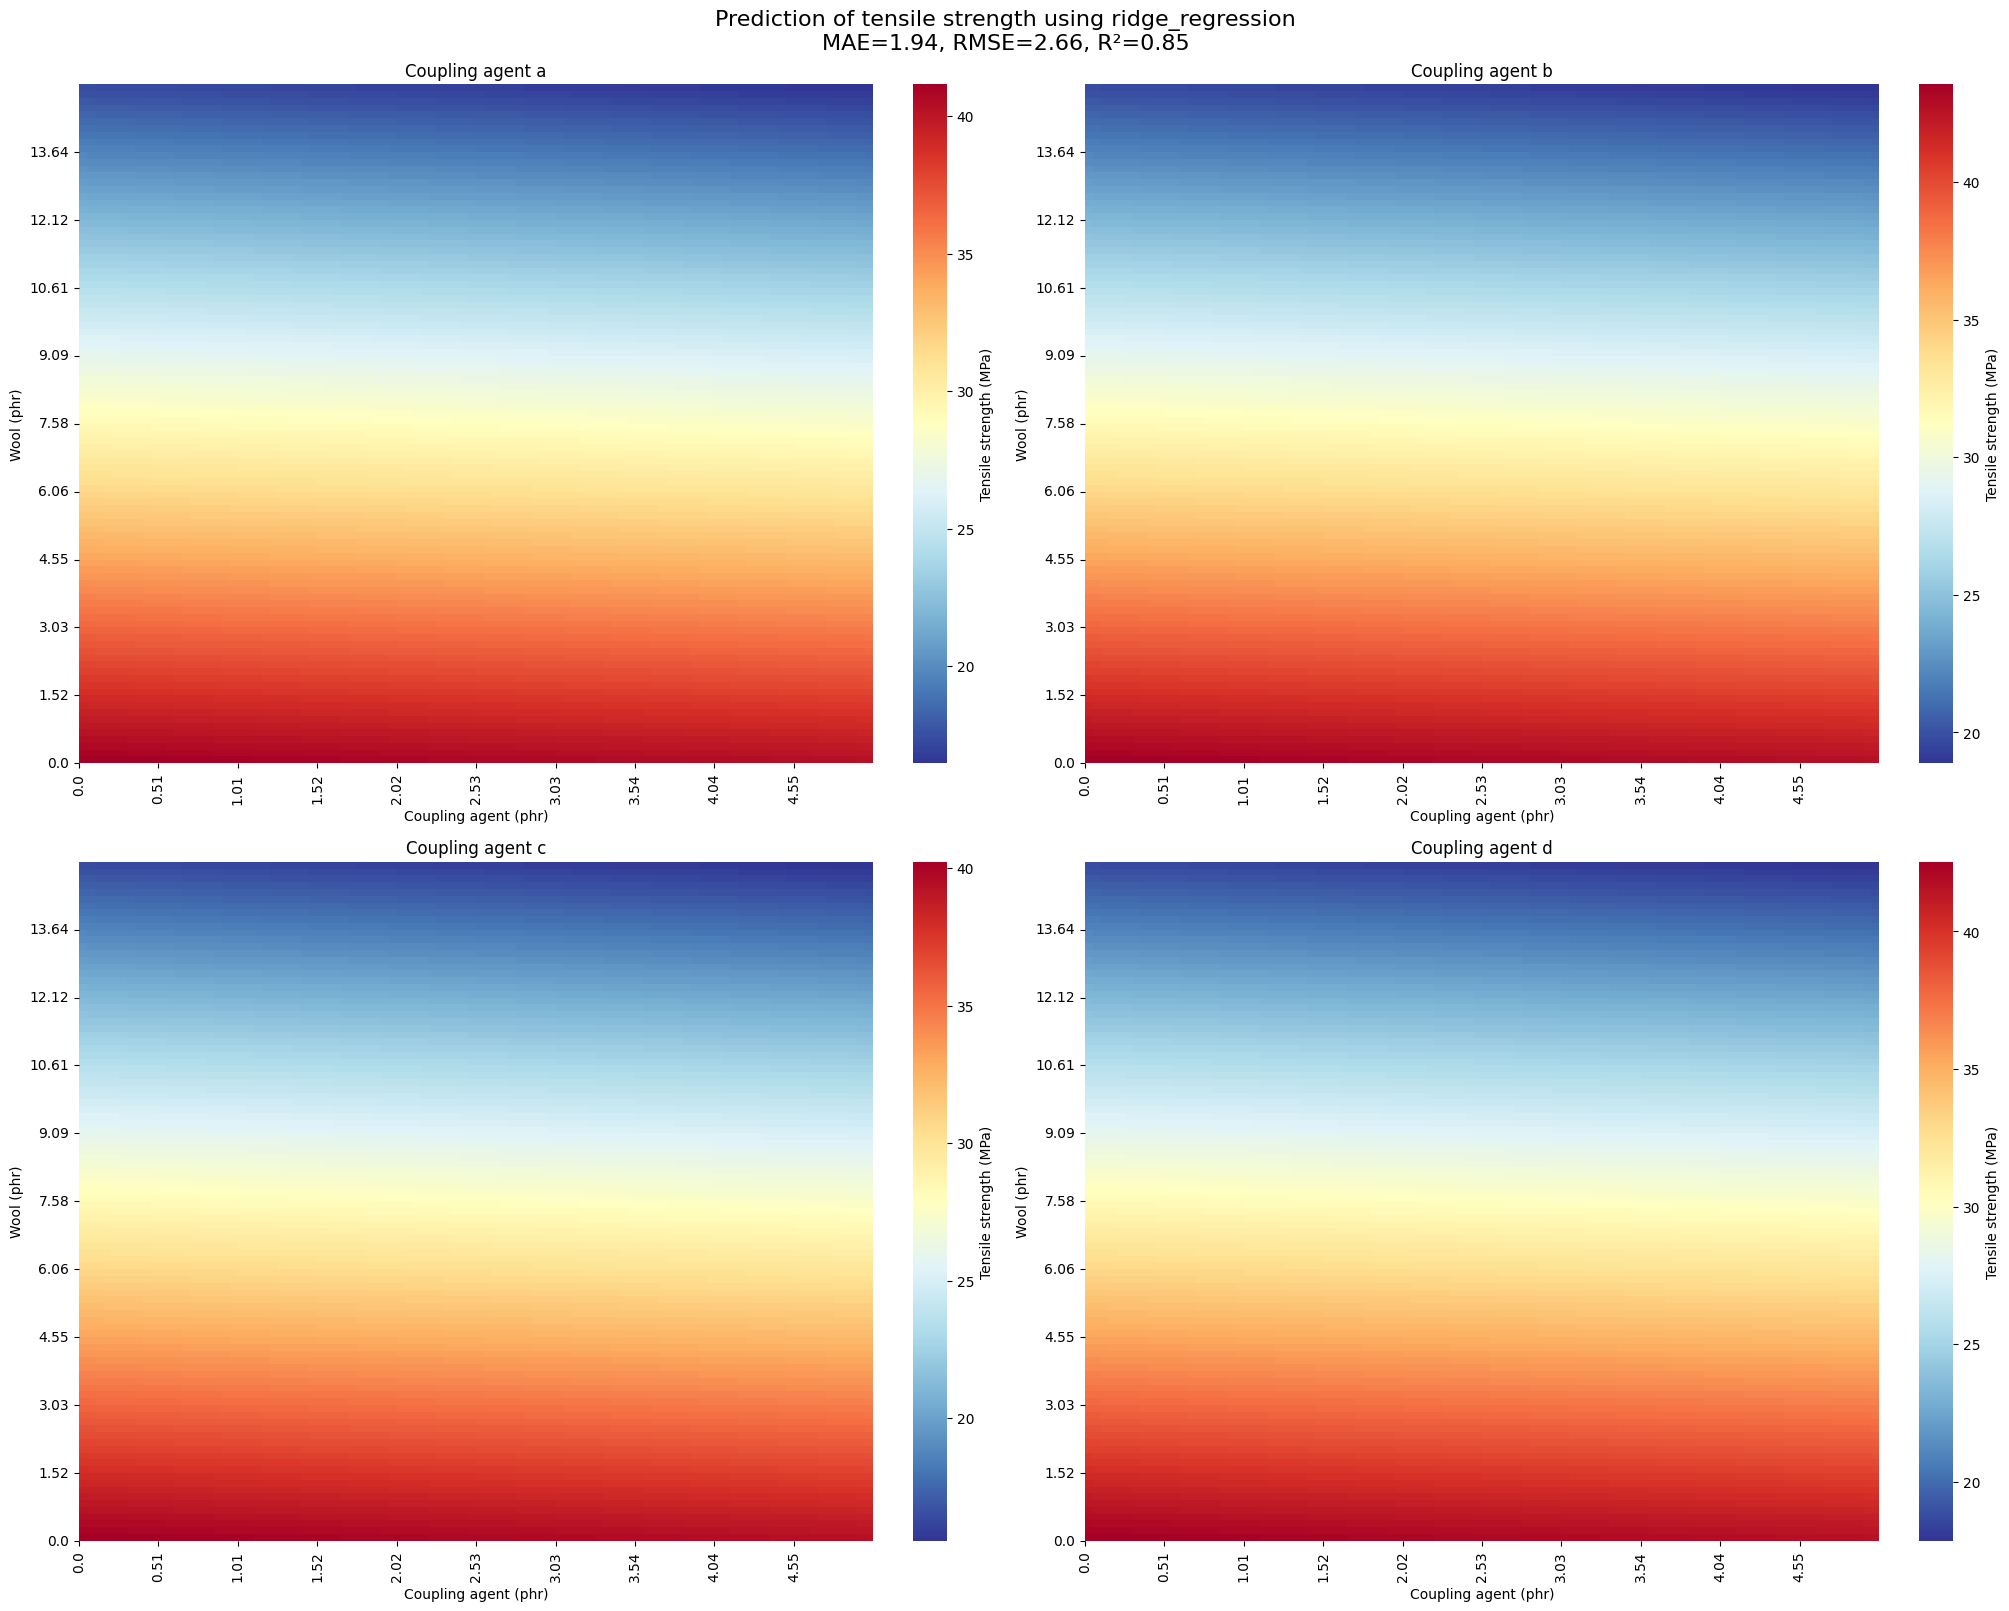

XGBoost - MSE: 4.785060826764696, MAE: 1.7344977315266932, RMSE: 2.1874781888660504, RSE: 0.09885855737084982, RAE: 0.27831920548627803, R²: 0.9011414426291502
Results saved to /content/drive/MyDrive/ANALIZA_DANYCH/Tensile_strength_xgboost_prediction.csv


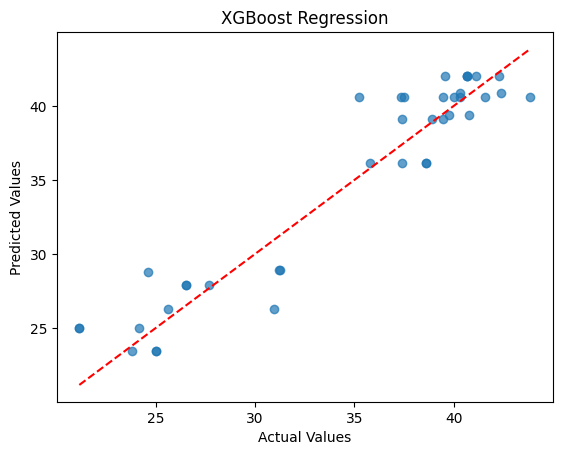

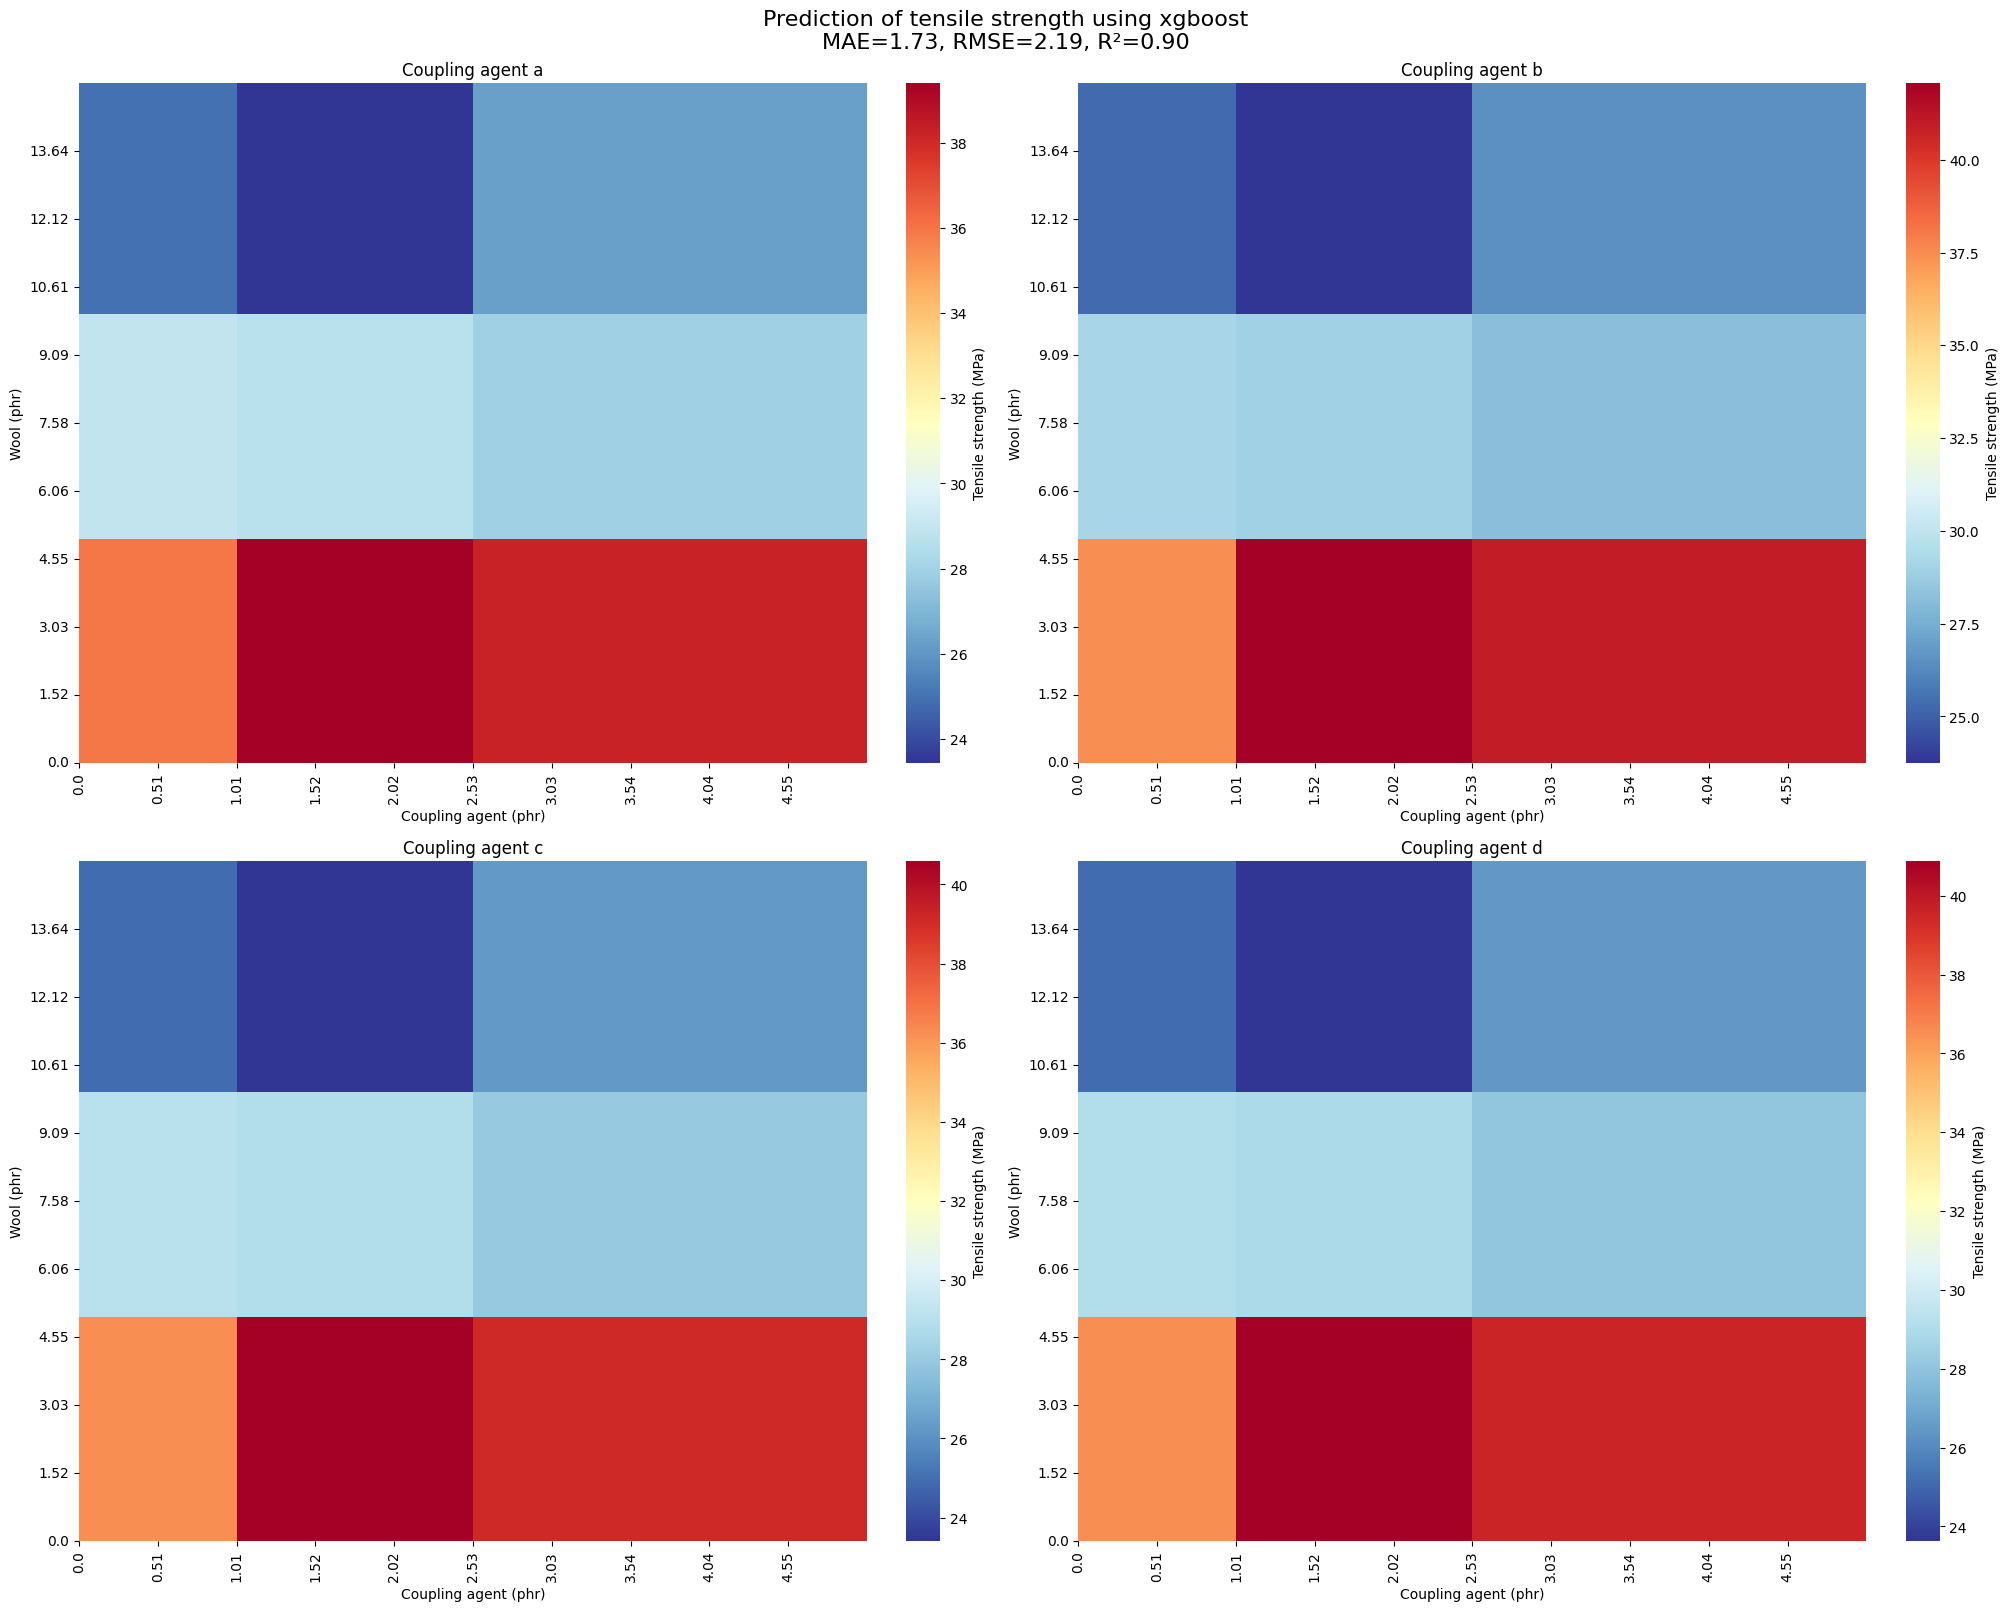

LightGBM - MSE: 4.796760857306359, MAE: 1.6367145646366252, RMSE: 2.1901508754664274, RSE: 0.09910027804743435, RAE: 0.2626288227177624, R²: 0.9008997219525656
Results saved to /content/drive/MyDrive/ANALIZA_DANYCH/Tensile_strength_lightgbm_prediction.csv


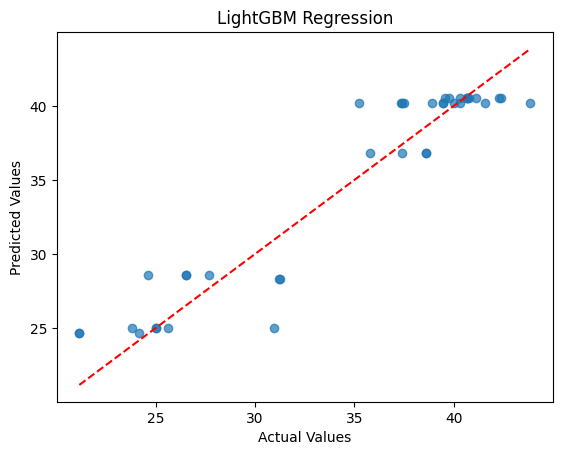

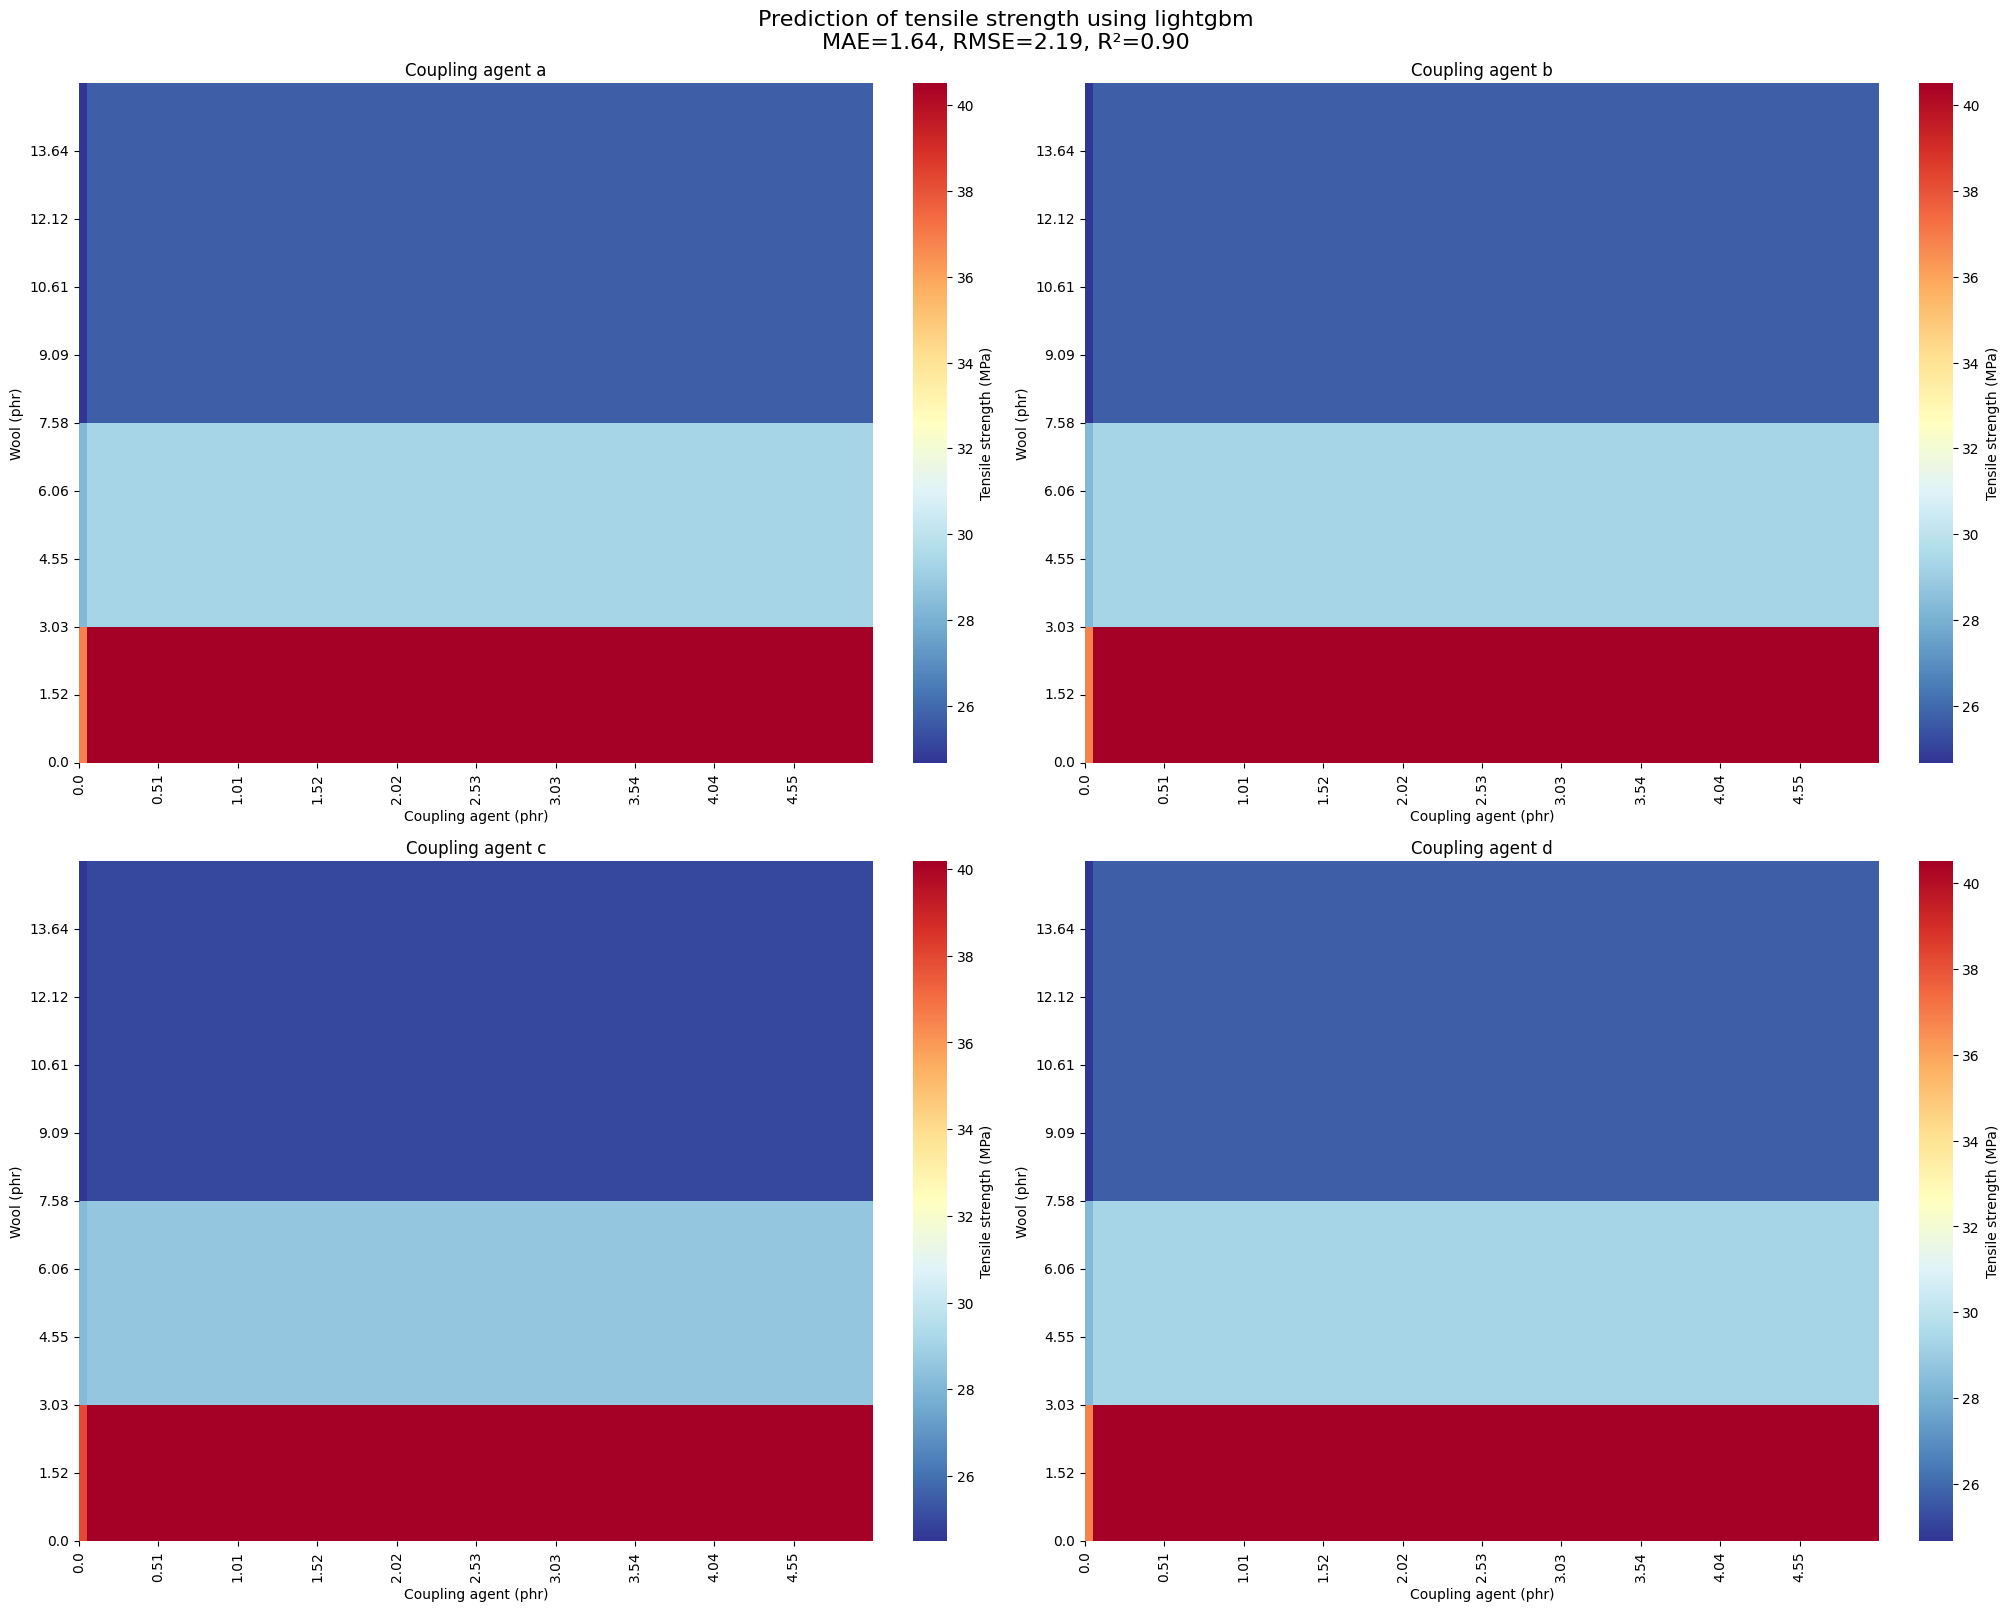

CatBoost - MSE: 4.76037391576939, MAE: 1.7206074195826295, RMSE: 2.181828113250306, RSE: 0.0983485299134583, RAE: 0.2760903524218087, R²: 0.9016514700865417
Results saved to /content/drive/MyDrive/ANALIZA_DANYCH/Tensile_strength_catboost_prediction.csv


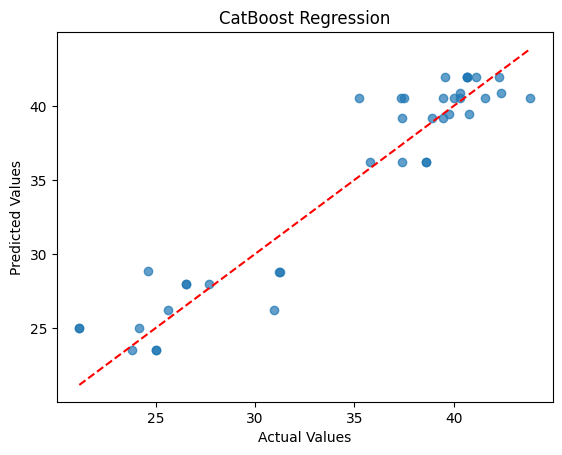

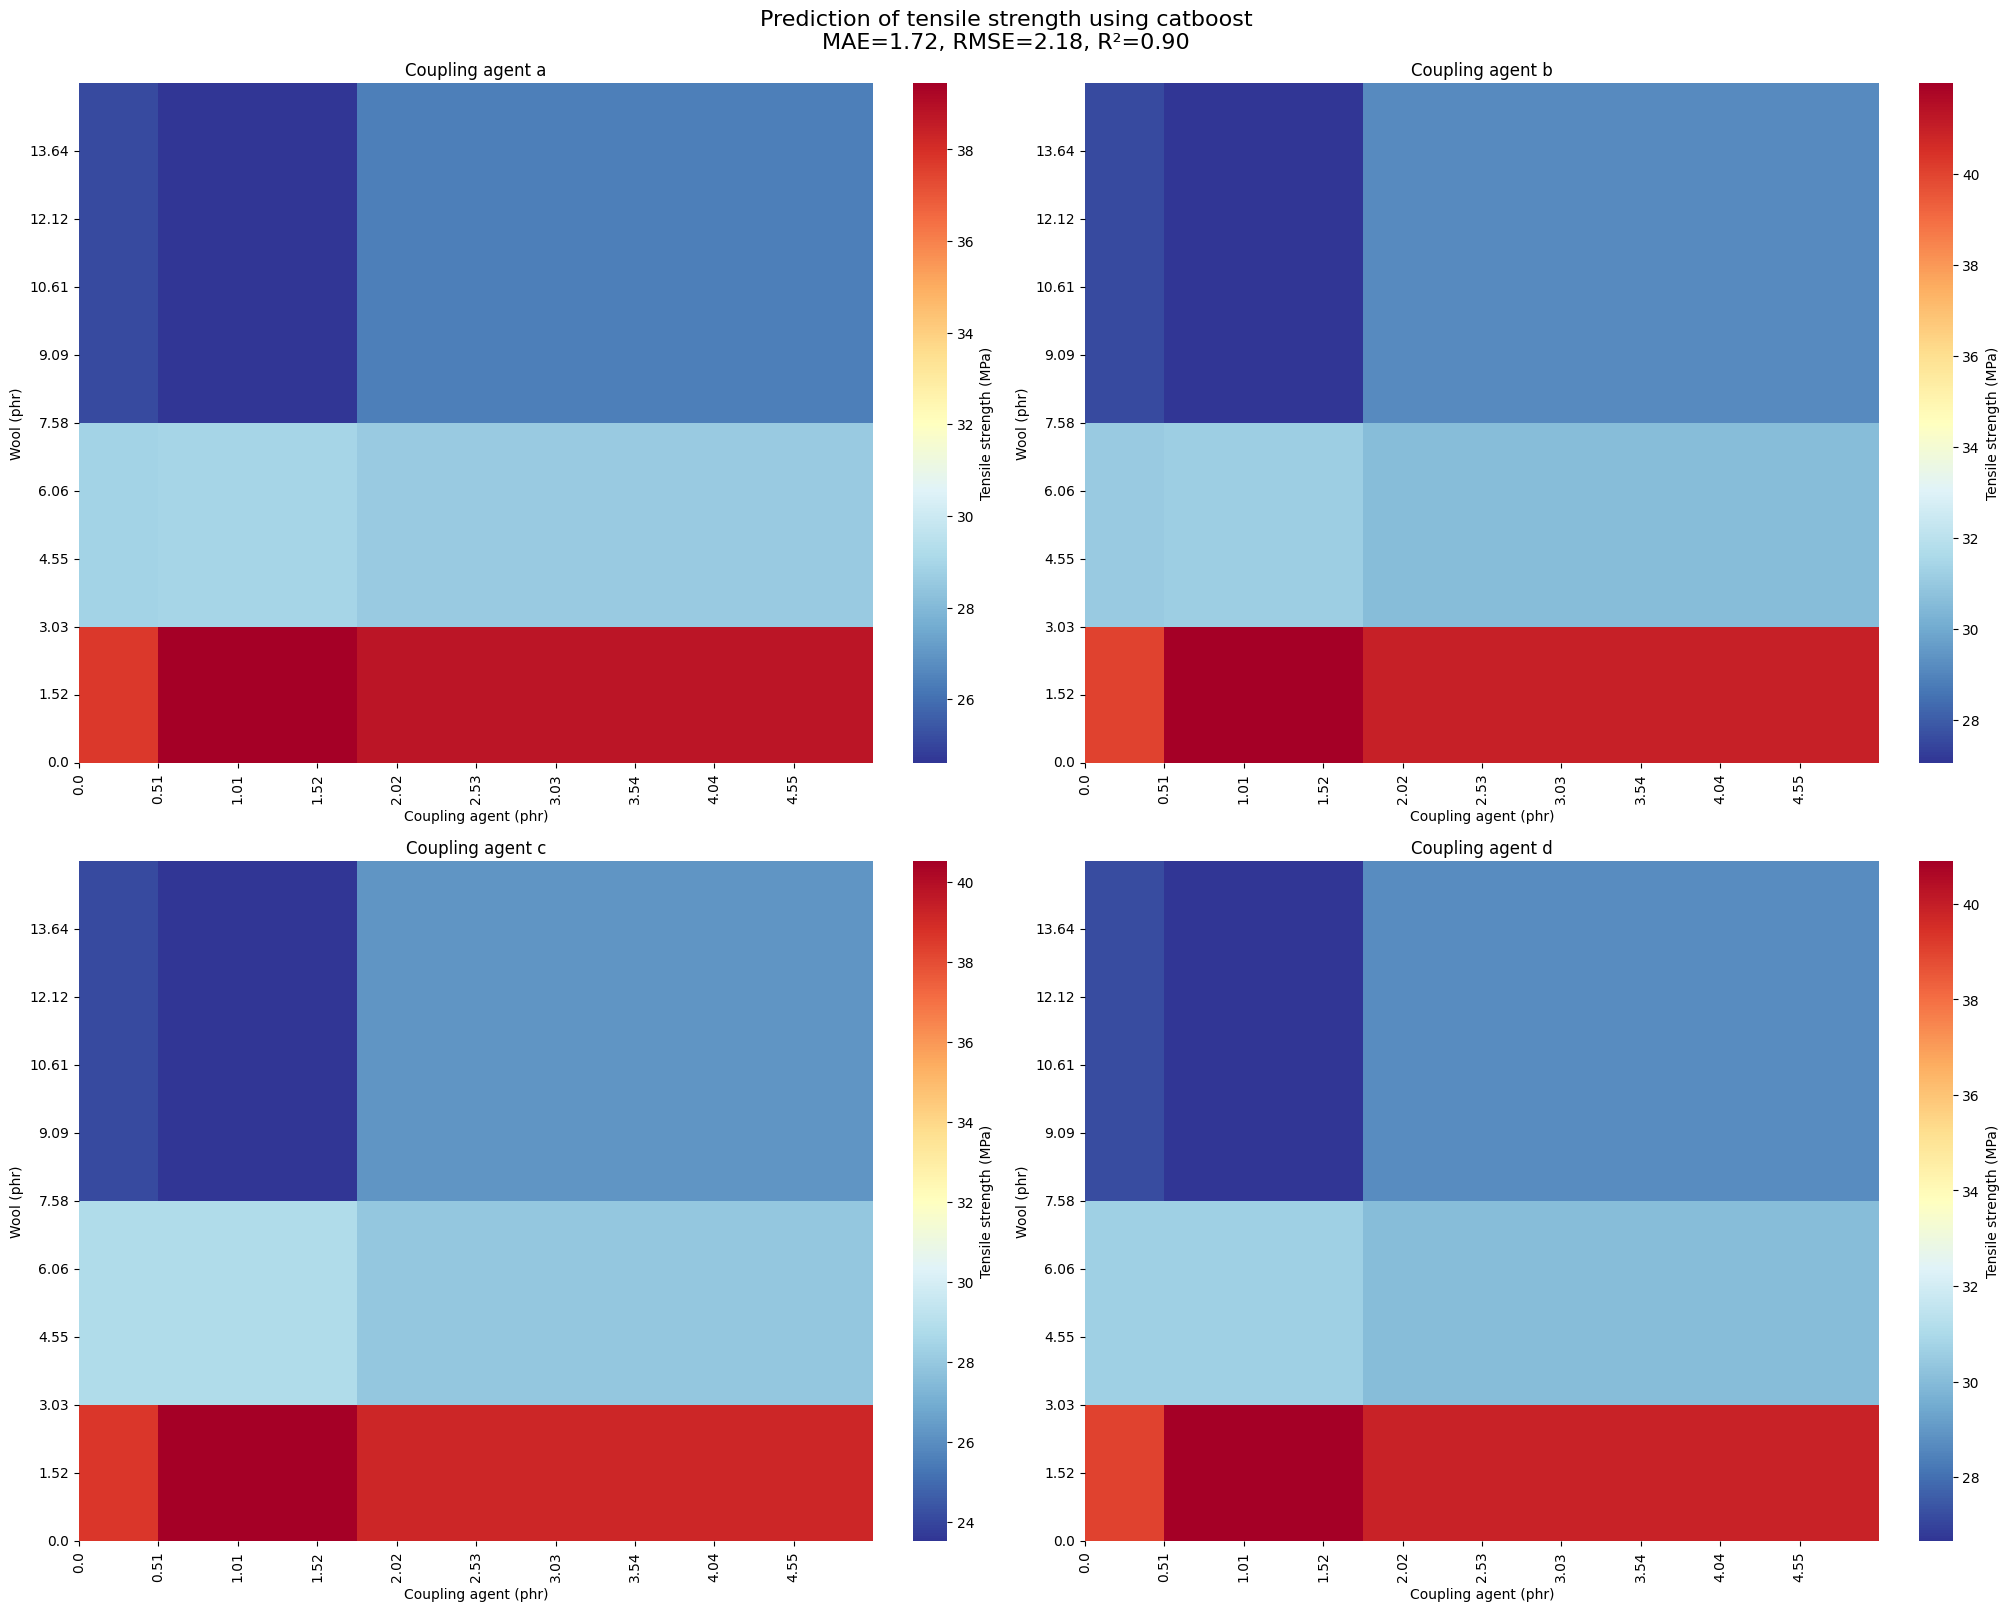

Model Comparison Results:
                        MSE       MAE      RMSE       RSE       RAE        R²  \
Linear Regression  7.145452  1.980268  2.673098  0.147624  0.317756  0.852376   
Gradient Boosting  4.825482   1.74428  2.196698  0.099694  0.279889  0.900306   
Random Forest      4.910021  1.765061  2.215857   0.10144  0.283223   0.89856   
SVR                7.139248   1.97679  2.671937  0.147496  0.317198  0.852504   
Ridge Regression   7.061263  1.943935  2.657304  0.145885  0.311926  0.854115   
XGBoost            4.785061  1.734498  2.187478  0.098859  0.278319  0.901141   
LightGBM           4.796761  1.636715  2.190151    0.0991  0.262629    0.9009   
CatBoost           4.760374  1.720607  2.181828  0.098349   0.27609  0.901651   

                                                         Predictions  
Linear Regression  [38.454602005629205, 24.29534144328706, 38.454...  
Gradient Boosting  [40.591649033407364, 23.30905355519605, 40.591...  
Random Forest      [40.57635849

<Figure size 1200x800 with 0 Axes>

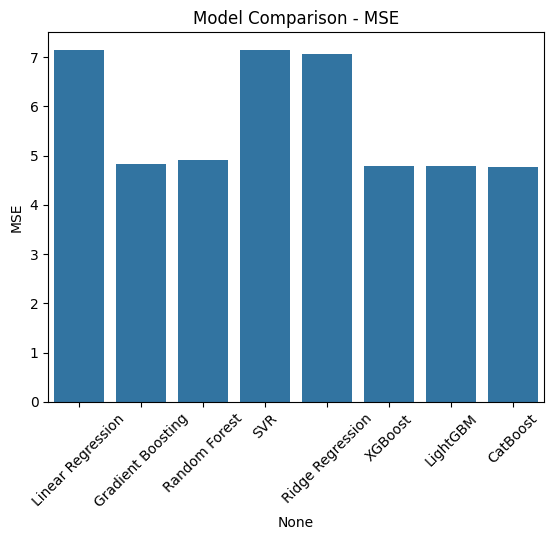

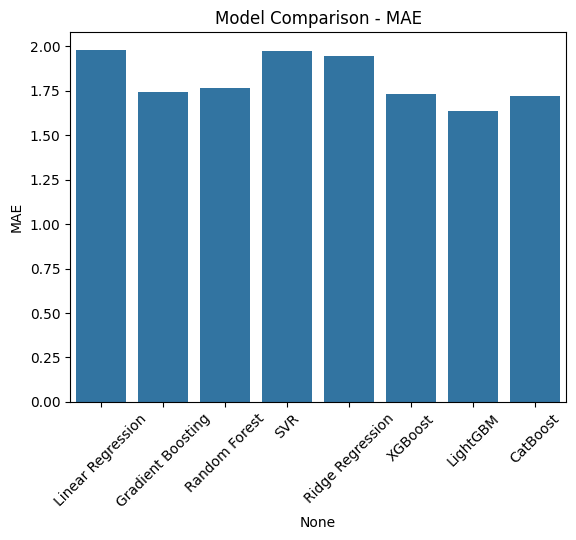

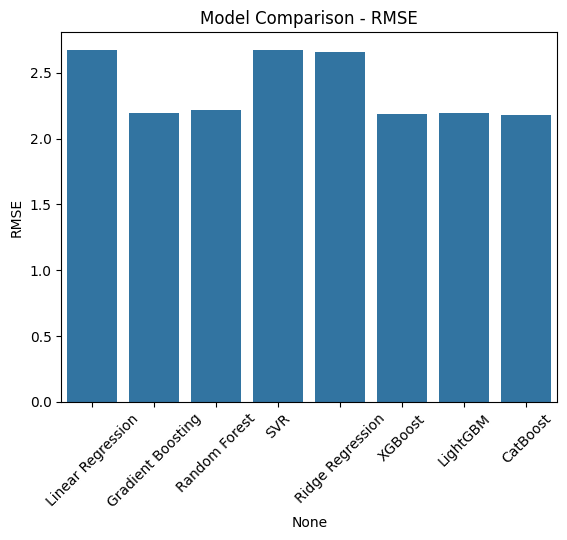

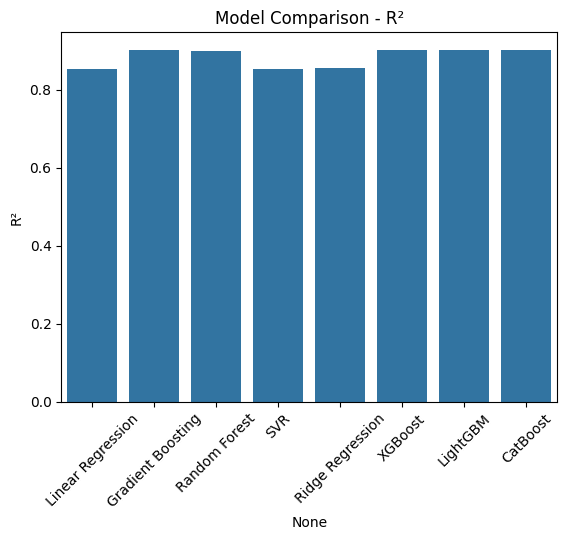

The best model is: CatBoost with RMSE: 2.181828113250306, MAE: 1.7206074195826295, R²: 0.9016514700865417


In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from google.colab import drive
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor

# Mounting Google Drive
drive.mount('/content/drive')
main_dir = '/content/drive/MyDrive/ANALIZA_DANYCH'

# Load data from CSV file
def load_data(filepath):
    data = pd.read_csv(filepath)
    print(f"Data loaded from {filepath}, shape: {data.shape}")
    print(f"Available columns: {data.columns.tolist()}")
    return data

# Prepare data
def preprocess_data(data):
    # Strip spaces from column names
    data.columns = data.columns.str.strip()

    # Select needed columns
    columns_needed = ['PLA_type', 'MLO_phr', 'wool_phr', 'ca_phr', 'ca_type', 'tensile strength']
    missing_columns = [col for col in columns_needed if col not in data.columns]
    if missing_columns:
        raise KeyError(f"Columns {missing_columns} are not in the dataframe")

    data = data[columns_needed]

    # Drop rows with missing values
    data = data.dropna()

    # Convert columns to numeric type where possible
    for col in ['MLO_phr', 'wool_phr', 'ca_phr', 'tensile strength']:
        data[col] = pd.to_numeric(data[col], errors='coerce')

    # Strip spaces from ca_type values
    data['ca_type'] = data['ca_type'].str.strip()

    # Extract unique ca_type values before conversion
    unique_ca_types = data['ca_type'].unique()
    print(f"Unique coupling agent types before conversion: {unique_ca_types}")

    # Convert 'ca_type' column to categorical variables
    data = pd.get_dummies(data, columns=['PLA_type', 'ca_type'])
    print(f"Columns after get_dummies: {data.columns.tolist()}")

    # Drop rows with missing values after conversion
    data = data.dropna()

    # Check if data is empty
    if data.empty:
        raise ValueError("Data is empty after preprocessing.")
    print(f"Data after preprocessing, shape: {data.shape}")

    # Extract features and target
    X = data.drop('tensile strength', axis=1).values
    y = data['tensile strength'].values
    return X, y, data.drop('tensile strength', axis=1), unique_ca_types

# Split data
def split_data(X, y, test_size=0.25, random_state=42):
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

# Train models
def train_models(X_train, y_train):
    models = {
        'Linear Regression': LinearRegression(),
        'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'SVR': SVR(kernel='rbf', C=1.0, epsilon=0.2),
        'Ridge Regression': Ridge(alpha=1.0),
        'XGBoost': xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
        'LightGBM': lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
        'CatBoost': CatBoostRegressor(iterations=100, learning_rate=0.1, depth=3, random_state=42, silent=True)
    }

    for name, model in models.items():
        model.fit(X_train, y_train)
        models[name] = model
    return models

# Evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    rse = np.sum((y_test - y_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2)
    rae = np.sum(np.abs(y_test - y_pred)) / np.sum(np.abs(y_test - np.mean(y_test)))
    return mse, mae, rmse, rse, rae, r2, y_pred

# Save results to CSV
def save_results(y_test, y_pred, filename, main_dir):
    results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    filepath = os.path.join(main_dir, filename)
    results.to_csv(filepath, index=False)
    print(f"Results saved to {filepath}")

# Visualize results
def plot_results(y_test, y_pred, model_name):
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{model_name} Regression')
    plt.show()

# Generate heatmaps
def generate_heatmaps(model, feature_columns, ca_type_values, ca_values, wool_values, filename_prefix, main_dir, mse, mae, r2):
    fig, axs = plt.subplots(2, 2, figsize=(20, 16), constrained_layout=True)
    axs = axs.flatten()
    fig.suptitle(f'Prediction of tensile strength using {filename_prefix}\nMAE={mae:.2f}, RMSE={np.sqrt(mse):.2f}, R²={r2:.2f}', fontsize=16)

    for i, ca_type_value in enumerate(ca_type_values[:4]):
        grid = np.zeros((len(wool_values), len(ca_values)))

        for j, wool in enumerate(wool_values):
            for k, ca in enumerate(ca_values):
                temp_data = pd.DataFrame(0, index=np.arange(1), columns=feature_columns.columns)
                temp_data['wool_phr'] = wool
                temp_data['ca_phr'] = ca
                temp_data[f'ca_type_{ca_type_value}'] = 1

                for col in feature_columns.columns:
                    if col not in temp_data.columns:
                        temp_data[col] = 0

                grid[j, k] = model.predict(temp_data[feature_columns.columns].values)[0]

        ax = axs[i]
        sns.heatmap(grid, xticklabels=np.round(ca_values, 2), yticklabels=np.round(wool_values, 2), cmap='RdYlBu_r', ax=ax, cbar_kws={'label': 'Tensile strength (MPa)'})
        ax.invert_yaxis()
        ax.set_xticks(np.arange(0, len(ca_values), step=10))
        ax.set_xticklabels(np.round(ca_values[::10], 2))
        ax.set_yticks(np.arange(0, len(wool_values), step=10))
        ax.set_yticklabels(np.round(wool_values[::10], 2))
        ax.set_xlabel('Coupling agent (phr)')
        ax.set_ylabel('Wool (phr)')
        ax.set_title(f'Coupling agent {ca_type_value}')

    plt.savefig(os.path.join(main_dir, f'{filename_prefix}_heatmaps.png'))
    plt.show()

# Main function
def main():
    main_dir = '/content/drive/MyDrive/ANALIZA_DANYCH'
    filename = 'db_PLA_wool_ca_mechterm v2.csv'

    filepath = os.path.join(main_dir, filename)
    data = load_data(filepath)
    X, y, feature_columns, unique_ca_types = preprocess_data(data)

    X_train, X_test, y_train, y_test = split_data(X, y)
    print(f"Train set: {X_train.shape}, Test set: {X_test.shape}")

    models = train_models(X_train, y_train)
    results = {}
    predictions = {}

    ca_values = np.linspace(0, 5, 100)
    wool_values = np.linspace(0, 15, 100)
    unique_ca_types = [ca_type.strip() for ca_type in unique_ca_types]
    filtered_ca_types = [ca_type for ca_type in unique_ca_types if ca_type in ['a', 'b', 'c', 'd']]
    print(f"Filtered unique coupling agent types: {sorted(filtered_ca_types)}")

    for name, model in models.items():
        mse, mae, rmse, rse, rae, r2, y_pred = evaluate_model(model, X_test, y_test)
        results[name] = {
            'MSE': mse,
            'MAE': mae,
            'RMSE': rmse,
            'RSE': rse,
            'RAE': rae,
            'R²': r2,
            'Predictions': y_pred
        }
        predictions[name] = y_pred
        print(f'{name} - MSE: {mse}, MAE: {mae}, RMSE: {rmse}, RSE: {rse}, RAE: {rae}, R²: {r2}')
        save_results(y_test, y_pred, f'Tensile_strength_{name.lower().replace(" ", "_")}_prediction.csv', main_dir)
        plot_results(y_test, y_pred, name)
        generate_heatmaps(model, feature_columns, sorted(filtered_ca_types), ca_values, wool_values, name.lower().replace(" ", "_"), main_dir, mse, mae, r2)

    # Convert results to DataFrame and display
    results_df = pd.DataFrame(results).T
    print("Model Comparison Results:")
    print(results_df)

    # Save models
    for name, model in models.items():
        joblib.dump(model, os.path.join(main_dir, f'{name.lower().replace(" ", "_")}_model.pkl'))
    print("Models saved")

    # Plot model comparison
    metrics = ['MSE', 'MAE', 'RMSE', 'R²']
    plt.figure(figsize=(12, 8))
    for metric in metrics:
        plt.figure()
        sns.barplot(x=results_df.index, y=results_df[metric])
        plt.title(f'Model Comparison - {metric}')
        plt.xticks(rotation=45)
        plt.show()

    # Summarize best model
    numeric_results_df = results_df.drop(columns=['Predictions'])
    numeric_results_df = numeric_results_df.apply(pd.to_numeric, errors='coerce')
    best_model = numeric_results_df.loc[numeric_results_df['RMSE'].idxmin()]
    print(f"The best model is: {best_model.name} with RMSE: {best_model['RMSE']}, MAE: {best_model['MAE']}, R²: {best_model['R²']}")

if __name__ == "__main__":
    main()
